# `numpy` practice

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
%matplotlib inline

1. Do numpy exercises 6, 8, 9 and 19.

1. numpy exercise 44.

1. A snail curve is defined by the following equation in polar coordinates: $r = a + \cos\phi$. Plot the curve on an $x$-$y$ plane for several values of $a$. (Hint: `np.linspace` creates a linearly spaced array of values)

2. A *cochleoid* curve is defined by the following equation in polar coordinates: $r = a \dfrac{\sin\phi} {\phi }$. Plot the curve on an $x$-$y$ plane. (This time, use `np.where` to work around division by zero).

3. Given two arrays, `u` and `v`, construct the Cauchy matrix using 1) explicit broadcasting, and 2) `subtract.outer` attribute.

4. See "Monte Carlo Error propagation" (separate html)

N. Rougier, *Numpy 100 excercises*, https://github.com/rougier/numpy-100/blob/master/100_Numpy_exercises_no_solution.md

# Part 1

### exercise 6
Create a null vector of size 10 but the fifth value which is 1

In [2]:
a = np.zeros(10)
a[5] = 1
a

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.])

### exercise 8
Reverse a vector (first element becomes last)

In [3]:
np.random.seed(1)
a = np.random.uniform(-5, 5, size=10)
np.set_printoptions(precision=3)
print(a, a[::-1], sep='\n\n')

[-0.83   2.203 -4.999 -1.977 -3.532 -4.077 -3.137 -1.544 -1.032  0.388]

[ 0.388 -1.032 -1.544 -3.137 -4.077 -3.532 -1.977 -4.999  2.203 -0.83 ]


### exercise 9
Create a 3x3 matrix with values ranging from 0 to 8

In [4]:
a = np.arange(0, 9, dtype=int).reshape((3,3))
print(a)

[[0 1 2]
 [3 4 5]
 [6 7 8]]


### exercise 19
Create a 8x8 matrix and fill it with a checkerboard pattern

In [5]:
n = 8
a = np.zeros((n, n), dtype=int)
a[::2, ::2] = 1
a[1::2,1::2] = 1
print(a)

[[1 0 1 0 1 0 1 0]
 [0 1 0 1 0 1 0 1]
 [1 0 1 0 1 0 1 0]
 [0 1 0 1 0 1 0 1]
 [1 0 1 0 1 0 1 0]
 [0 1 0 1 0 1 0 1]
 [1 0 1 0 1 0 1 0]
 [0 1 0 1 0 1 0 1]]


# Part 2

### exercise 44
Consider a random 10x2 matrix representing cartesian coordinates, convert them to polar coordinates

In [6]:
np.random.seed(1)
a = np.random.uniform(-15, 15, size=20).reshape((10, 2))
print(a)

[[ -2.489   6.61 ]
 [-14.997  -5.93 ]
 [-10.597 -12.23 ]
 [ -9.412  -4.633]
 [ -3.097   1.165]
 [ -2.424   5.557]
 [ -8.866  11.344]
 [-14.178   5.114]
 [ -2.481   1.761]
 [-10.788  -9.057]]


In [7]:
x = a[:, 0]
y = a[:, 1]
r = (x ** 2 + y ** 2) ** .5
phi = np.arctan2(y, x)
polar = np.hstack((r[:, None], phi[:, None]))
print(polar)

[[ 7.063  1.931]
 [16.126 -2.765]
 [16.182 -2.285]
 [10.491 -2.684]
 [ 3.309  2.782]
 [ 6.062  1.982]
 [14.398  2.234]
 [15.072  2.795]
 [ 3.042  2.524]
 [14.086 -2.443]]


# Part 3
A snail curve is defined by the following equation in polar coordinates: $r = a + \cos\phi$. Plot the curve on an $x$-$y$ plane for several values of $a$. (Hint: `np.linspace` creates a linearly spaced array of values)

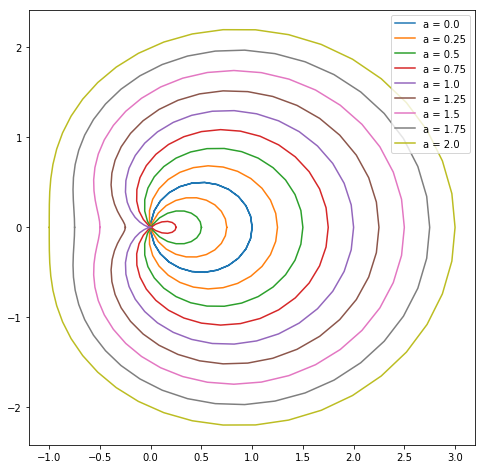

In [8]:
phi = np.linspace(-np.pi, np.pi, 51)
a = np.arange(0, 2 + .25, .25)
r = np.zeros((a.size, phi.size))
for i in range(r.shape[0]):
    r[i] = a[i] + np.cos(phi)

plt.subplots(figsize=(8, 8))
for i in range(r.shape[0]):
    x = r[i] * np.cos(phi)
    y = r[i] * np.sin(phi)
    plt.plot(x, y, label='a = ' + str(a[i]))
plt.legend()
plt.show()

# Part 4
A *cochleoid* curve is defined by the following equation in polar coordinates: $r = a \dfrac{\sin\phi} {\phi }$. Plot the curve on an $x$-$y$ plane. (This time, use `np.where` to work around division by zero).

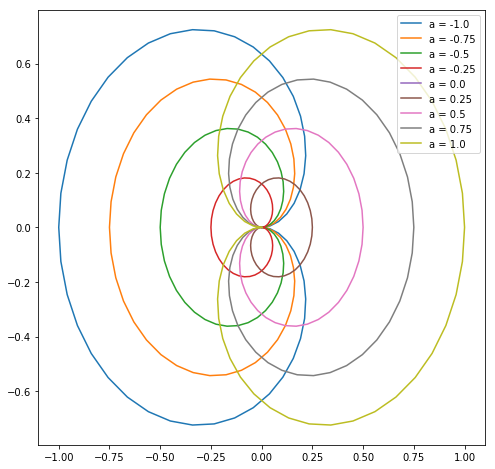

In [9]:
phi = np.linspace(-np.pi, np.pi, 51)
phi = phi[np.where(phi != 0)]
a = np.arange(-1, 1 + .25, .25)
r = np.zeros((a.size, phi.size))
for i in range(r.shape[0]):
    r[i] = a[i] * np.sin(phi) / phi
    
plt.subplots(figsize=(8, 8))
for i in range(r.shape[0]):
    x = r[i] * np.cos(phi)
    y = r[i] * np.sin(phi)
    plt.plot(x, y, label='a = ' + str(a[i]))
plt.legend()
plt.show()

# Part 5
Given two arrays, `u` and `v`, construct the Cauchy matrix using 1) explicit broadcasting, and 2) `subtract.outer` attribute.
$$
C_{jk} = \frac{1}{u_j - v_k}
$$

In [10]:
np.set_printoptions(precision=3)
u = np.arange(4)
#___1___
v = u + 0.5
C = 1 / (u[:, None] - v[None, :])
print('explicit broadcasting\n', C)
#___2___
C = 1 / np.subtract.outer(u, v)
print('\n\nsubtract.outer\n', C)

explicit broadcasting
 [[-2.    -0.667 -0.4   -0.286]
 [ 2.    -2.    -0.667 -0.4  ]
 [ 0.667  2.    -2.    -0.667]
 [ 0.4    0.667  2.    -2.   ]]


subtract.outer
 [[-2.    -0.667 -0.4   -0.286]
 [ 2.    -2.    -0.667 -0.4  ]
 [ 0.667  2.    -2.    -0.667]
 [ 0.4    0.667  2.    -2.   ]]


# Part 6
See "Monte Carlo Error propagation" (separate html)

### 1

In [36]:
mM1 = 40e4
sM1 = 500
mM2 = 30e4
sM2 = 1000
mr = 3.2
sr = .01
G = 6.67384e-11

In [37]:
mF = G * mM1 * mM2 / mr ** 2

<img src = '4.1.png'></img>

In [38]:
dfM1 = G * mM2 / mr ** 2
dfM2 = G * mM1 / mr ** 2
dfr = -2 * G * mM1 * mM2 / mr ** 3

In [39]:
sF = (dfM1**2 * sM1**2 + dfM2**2 * sM2**2 + dfr**2 * sr**2) ** .5 

In [40]:
print('F =', mF, '±', sF)

F = 0.7820906249999999 ± 0.005625407272639265


### 1 Monte-Carlo

In [41]:
n = 10**6
np.random.seed(1)
M1 = np.random.normal(mM1, sM1, size=n)
M2 = np.random.normal(mM2, sM2, size=n)
r = np.random.normal(mr, sr, size=n)
F = G * M1 * M2 / r ** 2

In [42]:
print('F =', F.mean(), '±', F.std())

F = 0.7821114988190035 ± 0.005628479872515584


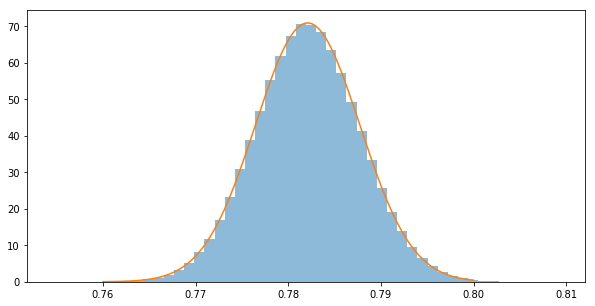

In [43]:
x = np.arange(0.76, 0.8, 0.0001)

plt.subplots(figsize=(10,5))
plt.hist(F, bins=50, alpha=.5, density = True)
plt.plot(x, norm.pdf(x, mF, sF))

### 2

In [44]:
mM1 = 40e4
sM1 = 2e4
mM2 = 30e4
sM2 = 10e4
mr = 3.2
sr = 1
G = 6.67384e-11

mF = G * mM1 * mM2 / mr ** 2
dfM1 = G * mM2 / mr ** 2
dfM2 = G * mM1 / mr ** 2
dfr = -2 * G * mM1 * mM2 / mr ** 3
sF = (dfM1**2 * sM1**2 + dfM2**2 * sM2**2 + dfr**2 * sr**2) ** .5 
print('F =', mF, '±', sF)

F = 0.7820906249999999 ± 0.5553593043410235


### 2 Monte-Carlo

In [45]:
n = 10**6
np.random.seed(1)
M1 = np.random.normal(mM1, sM1, size=n)
M2 = np.random.normal(mM2, sM2, size=n)
r = np.random.normal(mr, sr, size=n)

F = G * M1 * M2 / r ** 2
print('F =', F.mean(), '±', F.std())

F = 979.9788519691705 ± 644287.8731926193


In [56]:
print(min(abs(F)), max(abs(F)), min(F))

1.0853010779573736e-05 599315863.9299655 -41.19830499821575


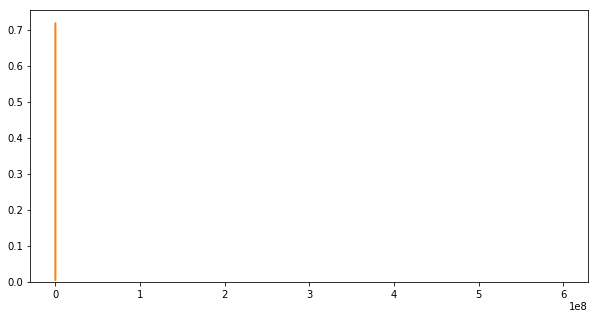

In [67]:
x = np.arange(-1, 2.5, .001)

plt.subplots(figsize=(10,5))
plt.hist(F, bins=100, alpha=.5, density = True)
plt.plot(x, norm.pdf(x, mF, sF))

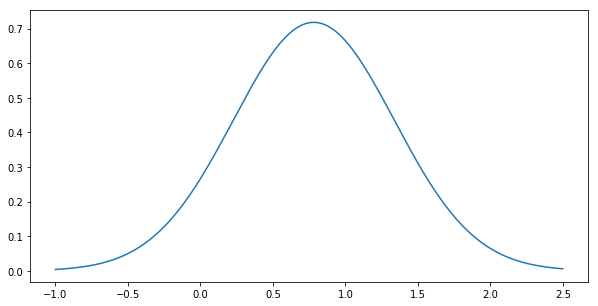

In [63]:
x = np.arange(-1, 2.5, .001)

plt.subplots(figsize=(10,5))
#plt.hist(F, bins=50, alpha=.5, density = True)
plt.plot(x, norm.pdf(x, mF, sF))

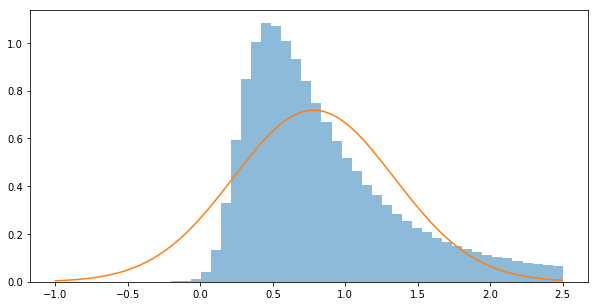

In [72]:
x = np.arange(-1, 2.5, 0.001)

plt.subplots(figsize=(10,5))
#if we exclude some of them
plt.hist(F[(F<2.5) & (F>-1)], bins=50, alpha=.5, density = True)
plt.plot(x, norm.pdf(x, mF, sF))

In [74]:
#let's make more tries for MC
n = 10**8
np.random.seed(1)
M1 = np.random.normal(mM1, sM1, size=n)
M2 = np.random.normal(mM2, sM2, size=n)
r = np.random.normal(mr, sr, size=n)

F = G * M1 * M2 / r ** 2
print('F =', F.mean(), '±', F.std())

F = 239452.6205845099 ± 2287137983.3339205


it seems it became worse

So, with uncertainties comparable to the measurements themselves, it is better not to use M-C.